In [1]:
from qiskit import QuantumCircuit
from qiskit_ibm_provider import IBMProvider

import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from models import VictimParams
from qiskit.result import marginal_counts

In [2]:
provider = IBMProvider()

# Job - ci68jhtejm3lf1f43970

In [3]:
job_id = 'ci68jhtejm3lf1f43970'

In [4]:
with open('./other_experiments/delay_exps_2.p', 'rb') as f:
    (empty_qc, experiment_qcs) = pickle.load(f)

In [5]:
# [
#     h_delay_h_qcs, sx_delay_sx_x_qcs,
#     h_xxxx_h_qcs, sx_xxxx_sx_x_qcs,
#     h_delayxx_h_qcs, sx_delayxx_sx_x_qcs
# ] = experiment_qcs

In [6]:
job = provider.backend.retrieve_job(job_id)
qcs = job.circuits()
counts = job.result().get_counts()

In [7]:
qcs[3].name

'H, delay, H-121'

In [8]:
# sx_delay_sx_x_qcs[2].name

## Empty QC

In [9]:
count = counts[0]

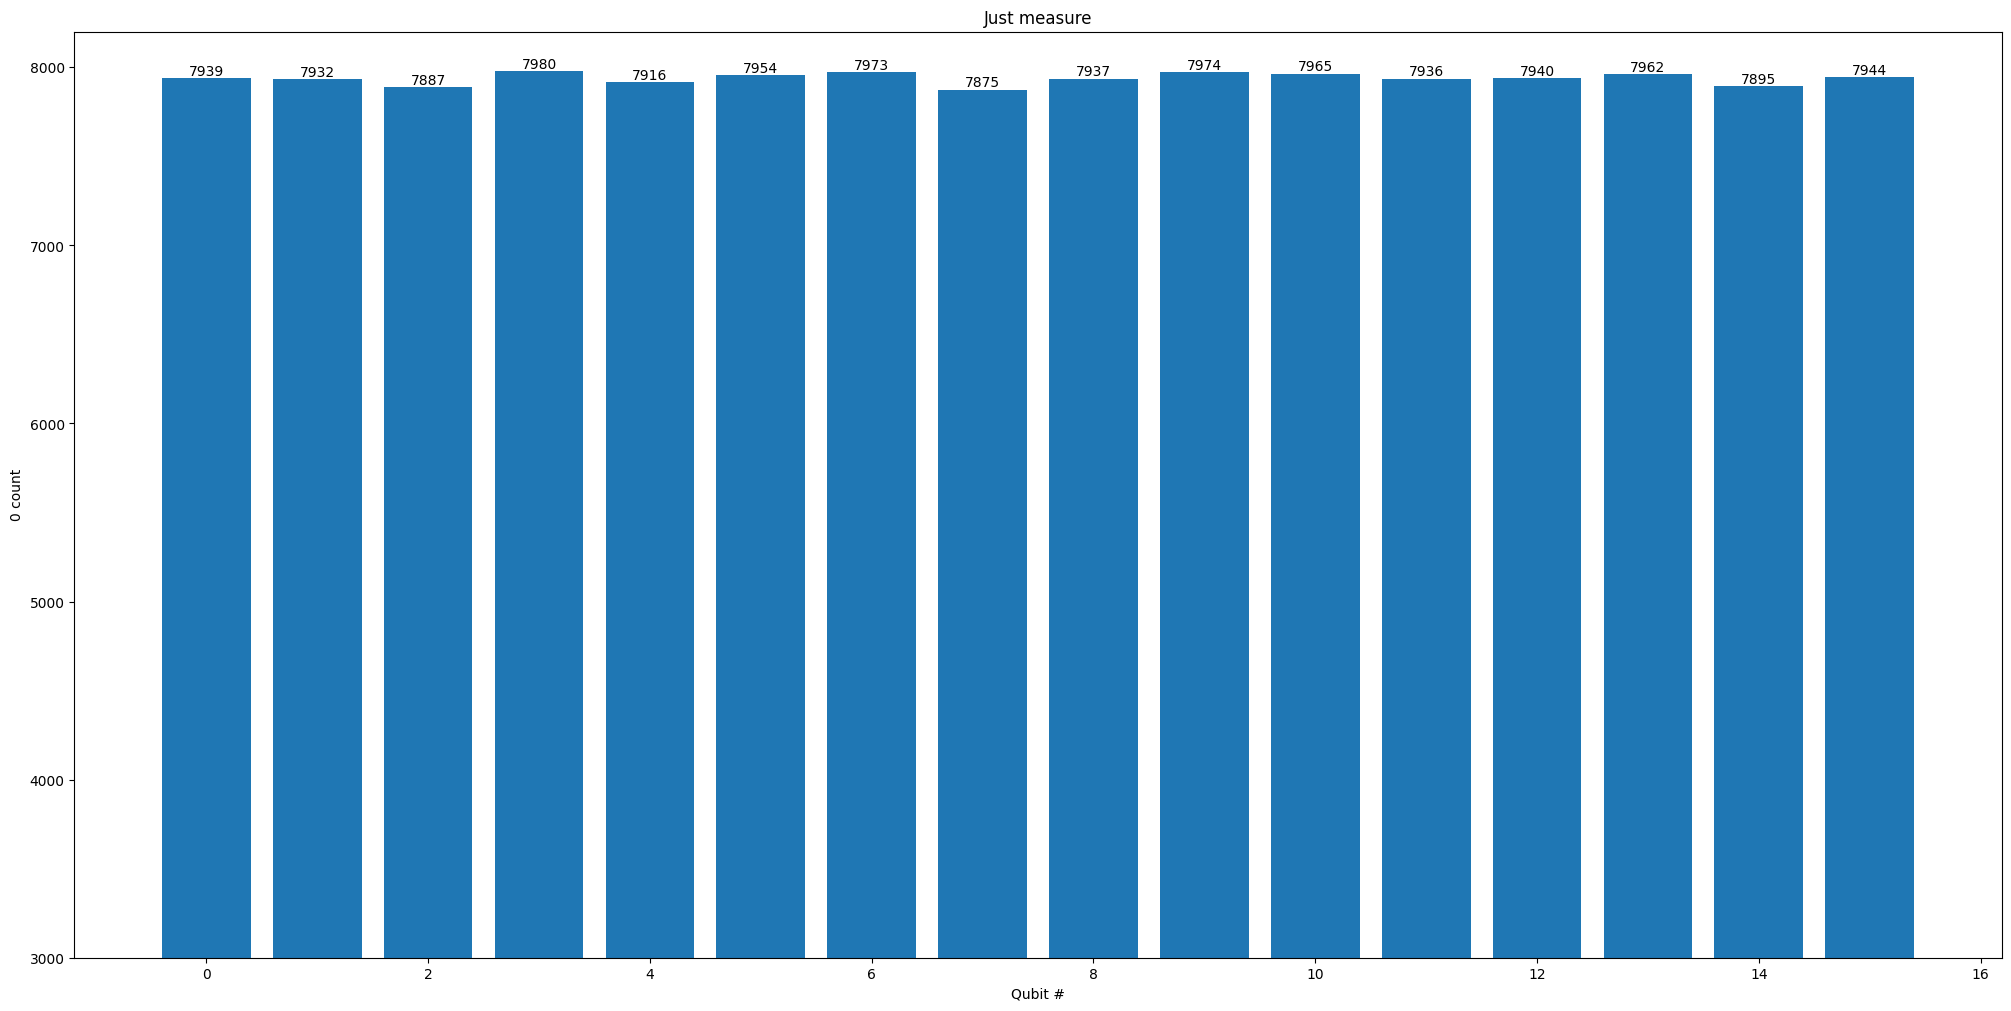

In [10]:
data = []
for j in range(16):
    c = marginal_counts(count, [j,]).get('0', 0)
    data.append(c)
fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))
# Add value labels on top of each bar
for j, value in enumerate(data):
    plt.text(j, value, str(value), ha='center', va='bottom')
x = range(len(data))
ax.bar(x, data)
ax.set_ylim(3000, 8200)
ax.set_title('Just measure')
ax.set_xlabel('Qubit #')
ax.set_ylabel('0 count')
plt.show()

## Split counts

In [11]:
split_counts = []

In [12]:
start_index = 1
for experiment_qc in experiment_qcs:
    end_index = start_index + len(experiment_qc)
    split_counts.append(counts[start_index: end_index])
    start_index = end_index

## H - delay - H

In [13]:
counts_2 = split_counts[0]
delays = [ 160, 320, 640, 1280, 2560, 5120, 10240 ]
assert(len(counts_2) == len(delays))
title = 'H - delay - H'
snooper_qubits = range(16)

range(0, 8)


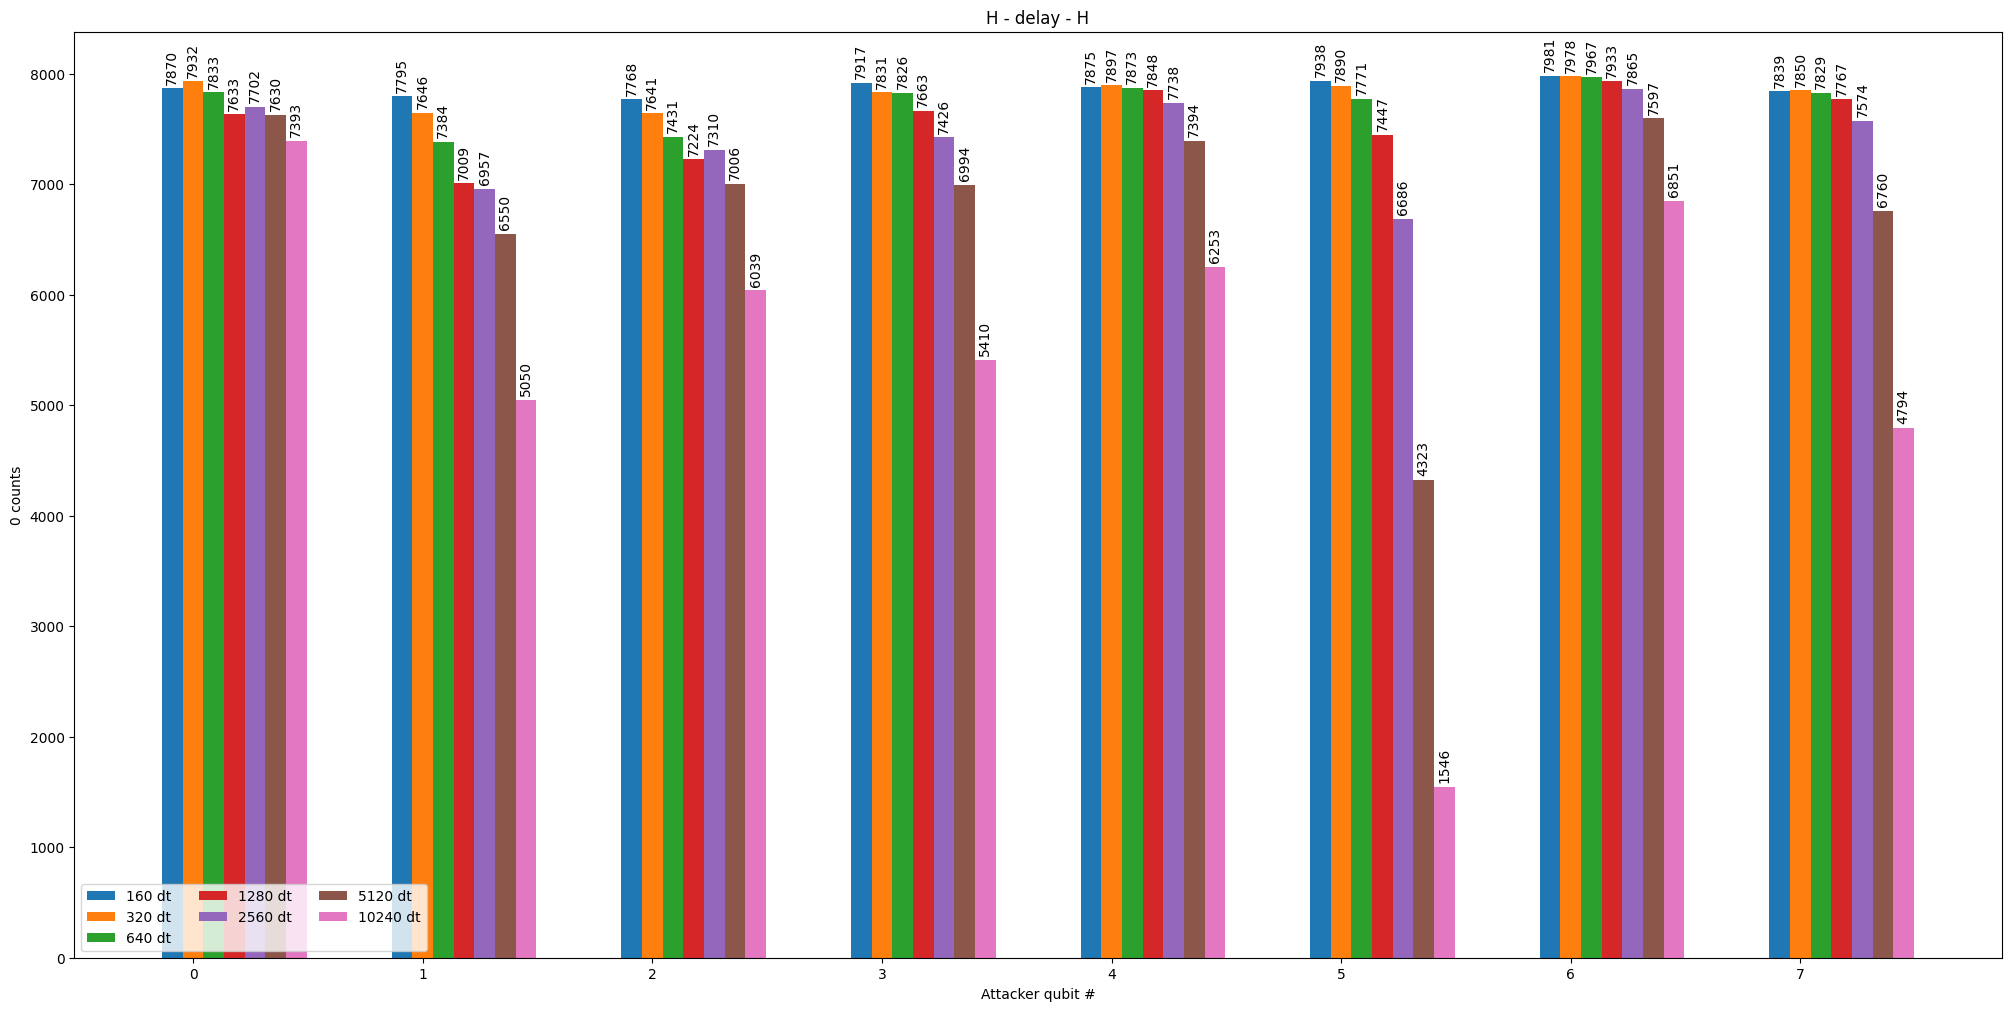

range(8, 16)


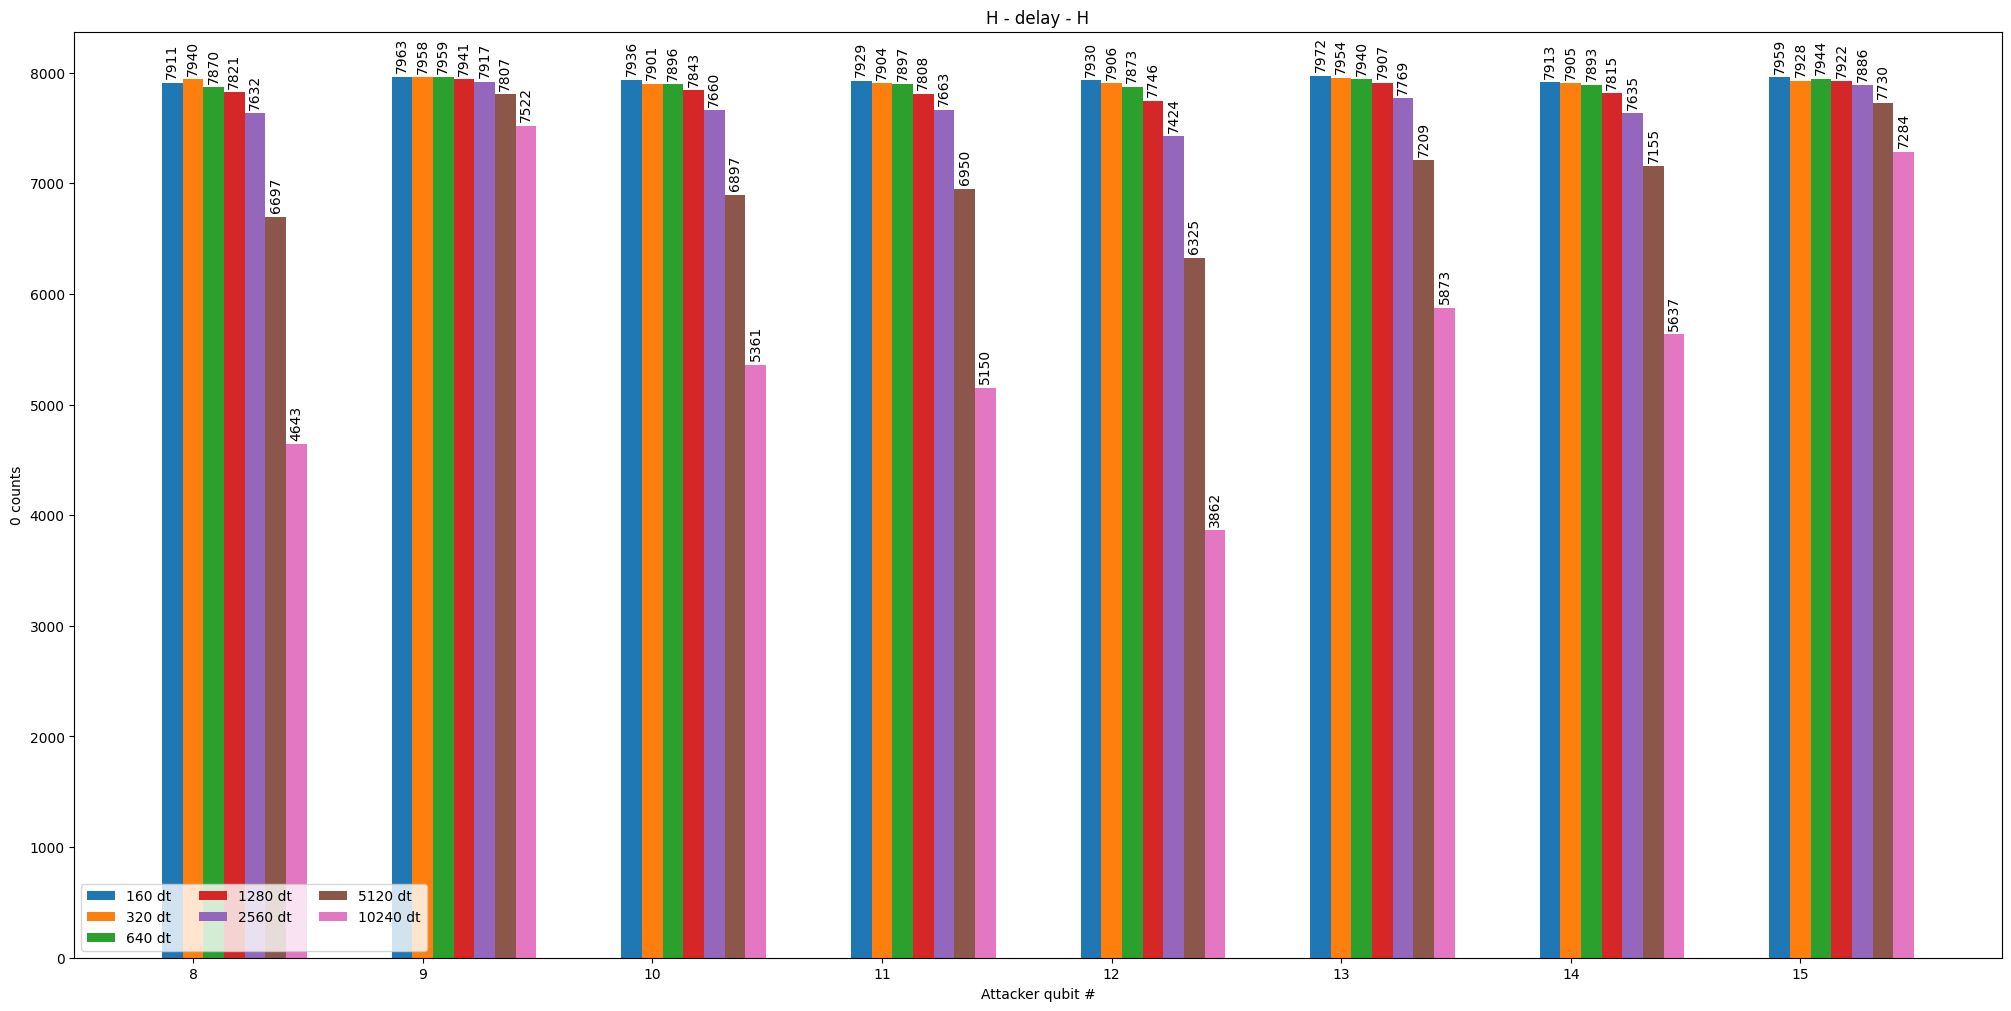

In [14]:
n = 8
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, delay in zip(counts_2, delays):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        key = '{} dt'.format(delay)
        experiments[key] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.09
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title(title)
    ax.set_xticks(x + width, snooper_set)
    ax.legend(loc='lower left', ncols=3)

    plt.show()

## SX - delay - SX - X

In [15]:
counts_2 = split_counts[1]
delays = [ 160, 320, 640, 1280, 2560, 5120, 10240 ]
assert(len(counts_2) == len(delays))
title = 'SX - delay - SX - X'
snooper_qubits = range(16)

range(0, 8)


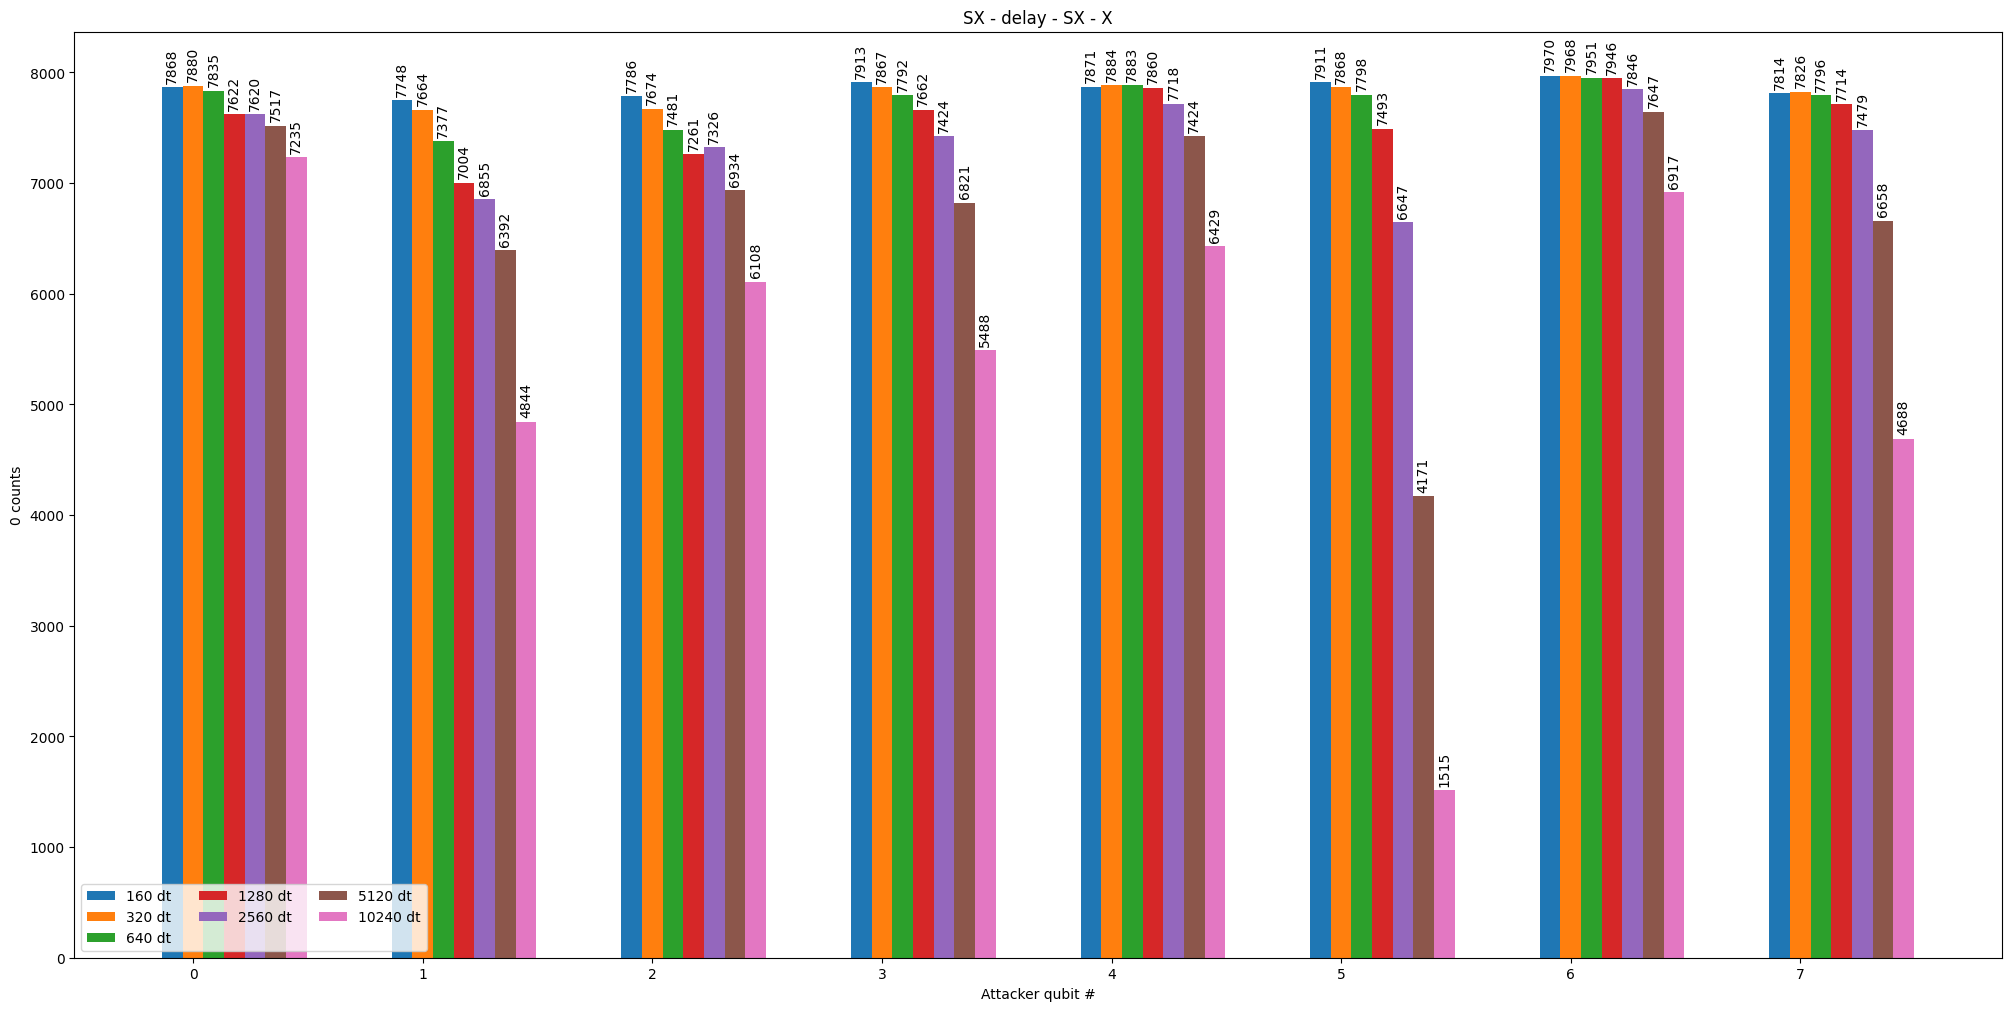

range(8, 16)


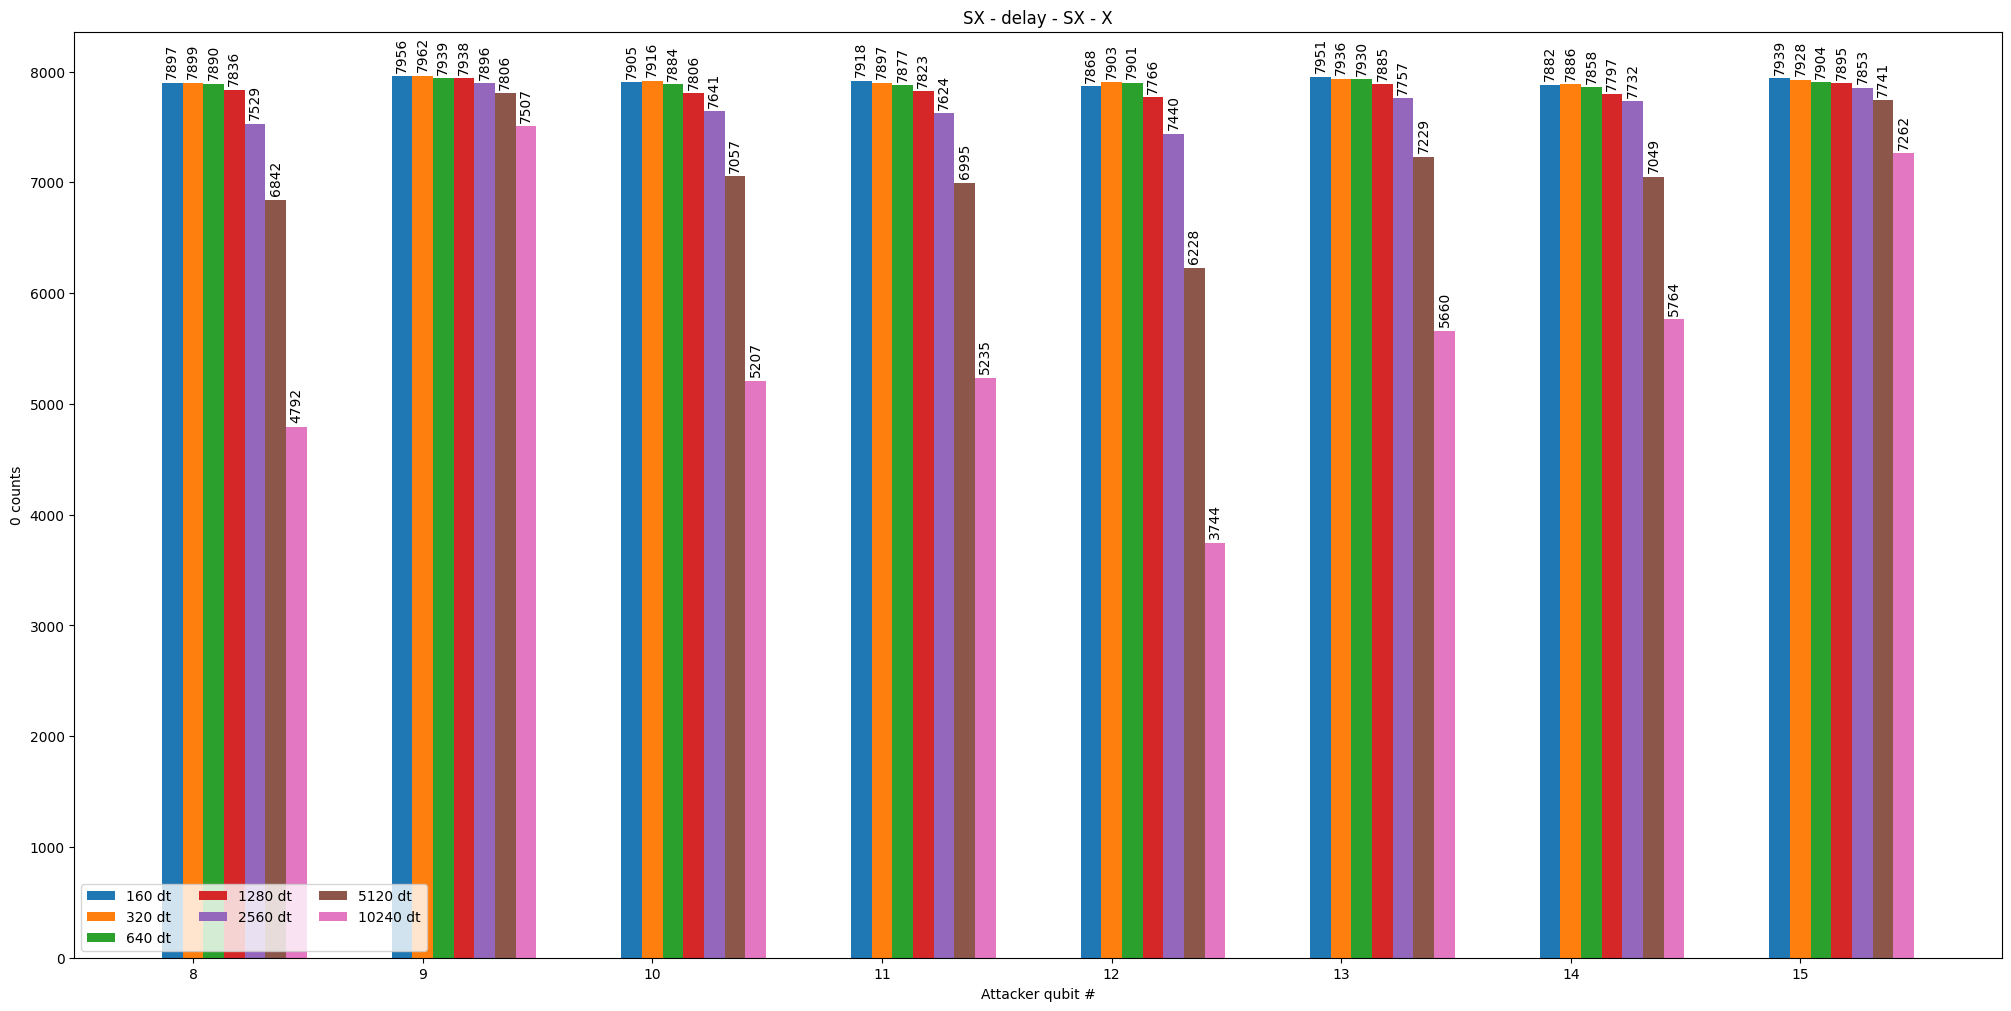

In [16]:
n = 8
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, delay in zip(counts_2, delays):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        key = '{} dt'.format(delay)
        experiments[key] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.09
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title(title)
    ax.set_xticks(x + width, snooper_set)
    ax.legend(loc='lower left', ncols=3)

    plt.show()

## h_xxxx_h_qcs

In [17]:
counts_2 = split_counts[2]
delays = [ 160, 320, 640, 1280, 2560, 5120, 10240 ]
assert(len(counts_2) == len(delays))
title = 'H - XXXX - H'
snooper_qubits = range(16)

range(0, 8)


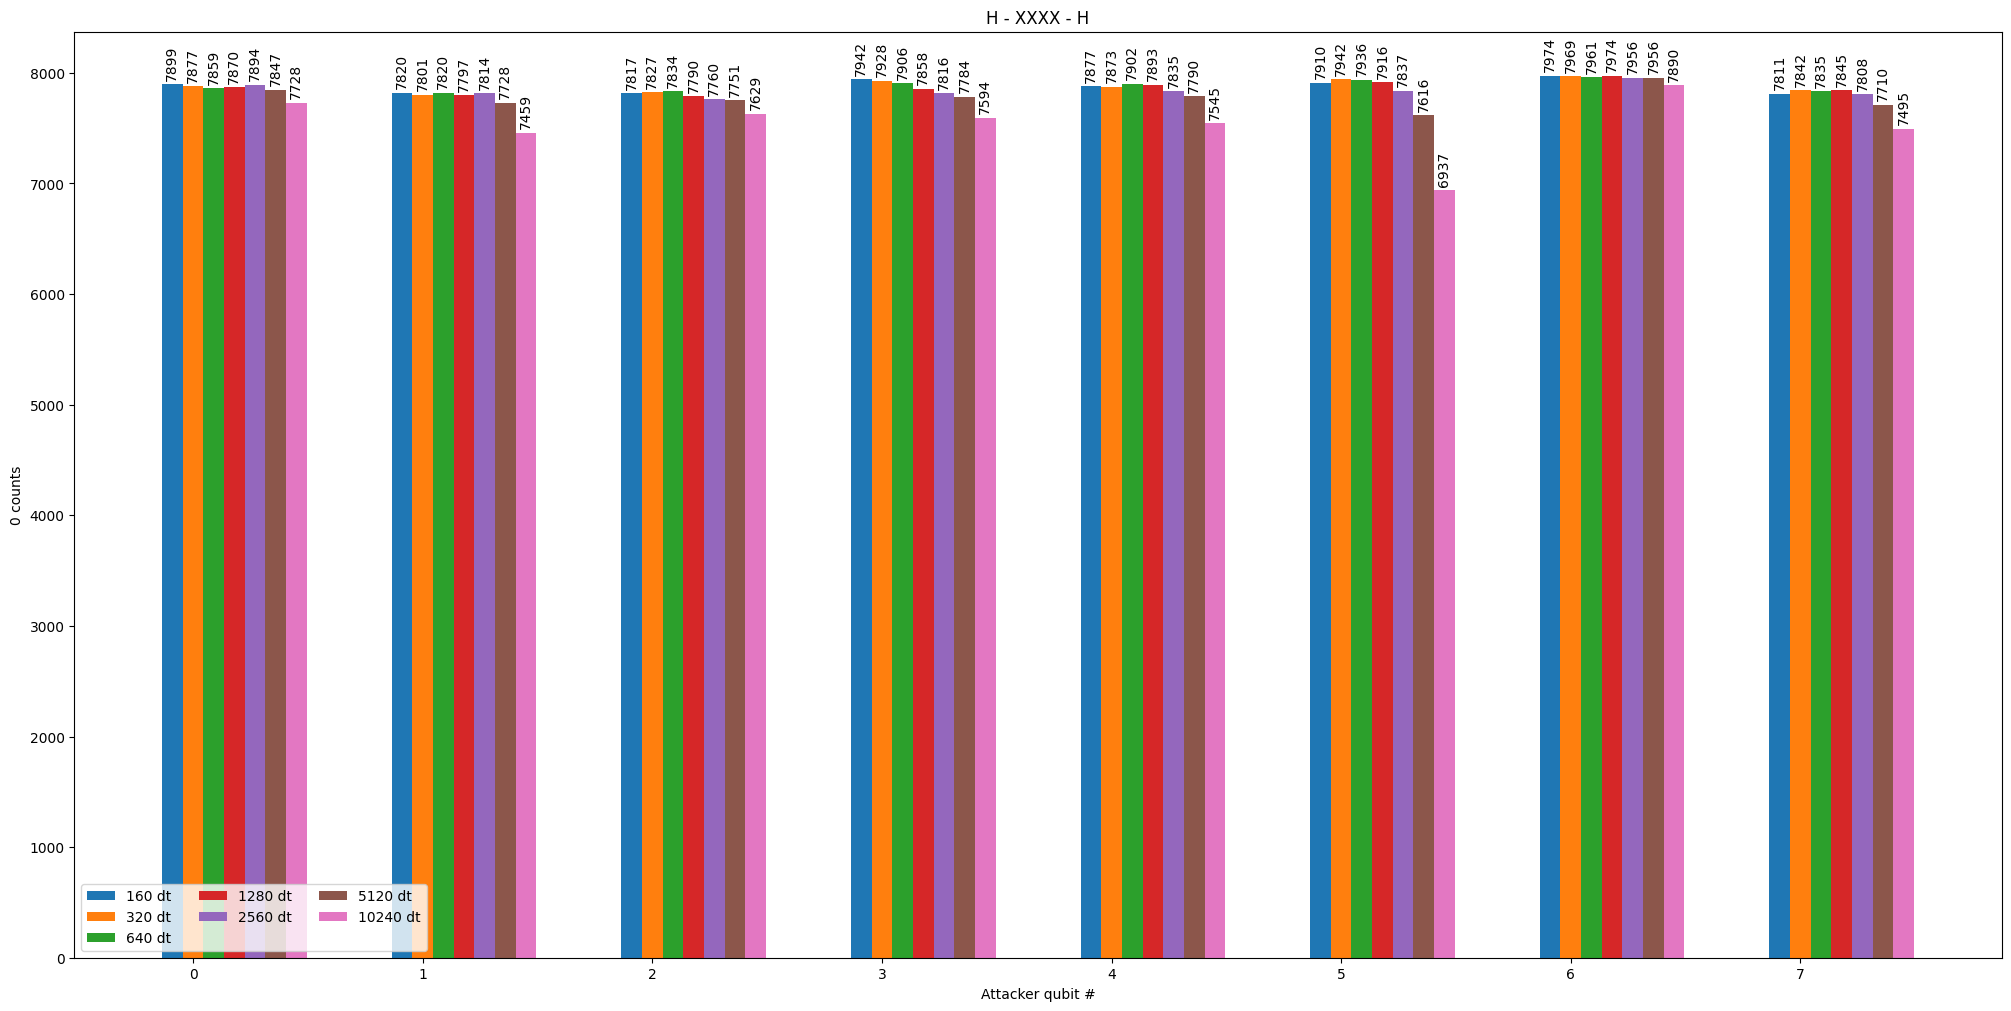

range(8, 16)


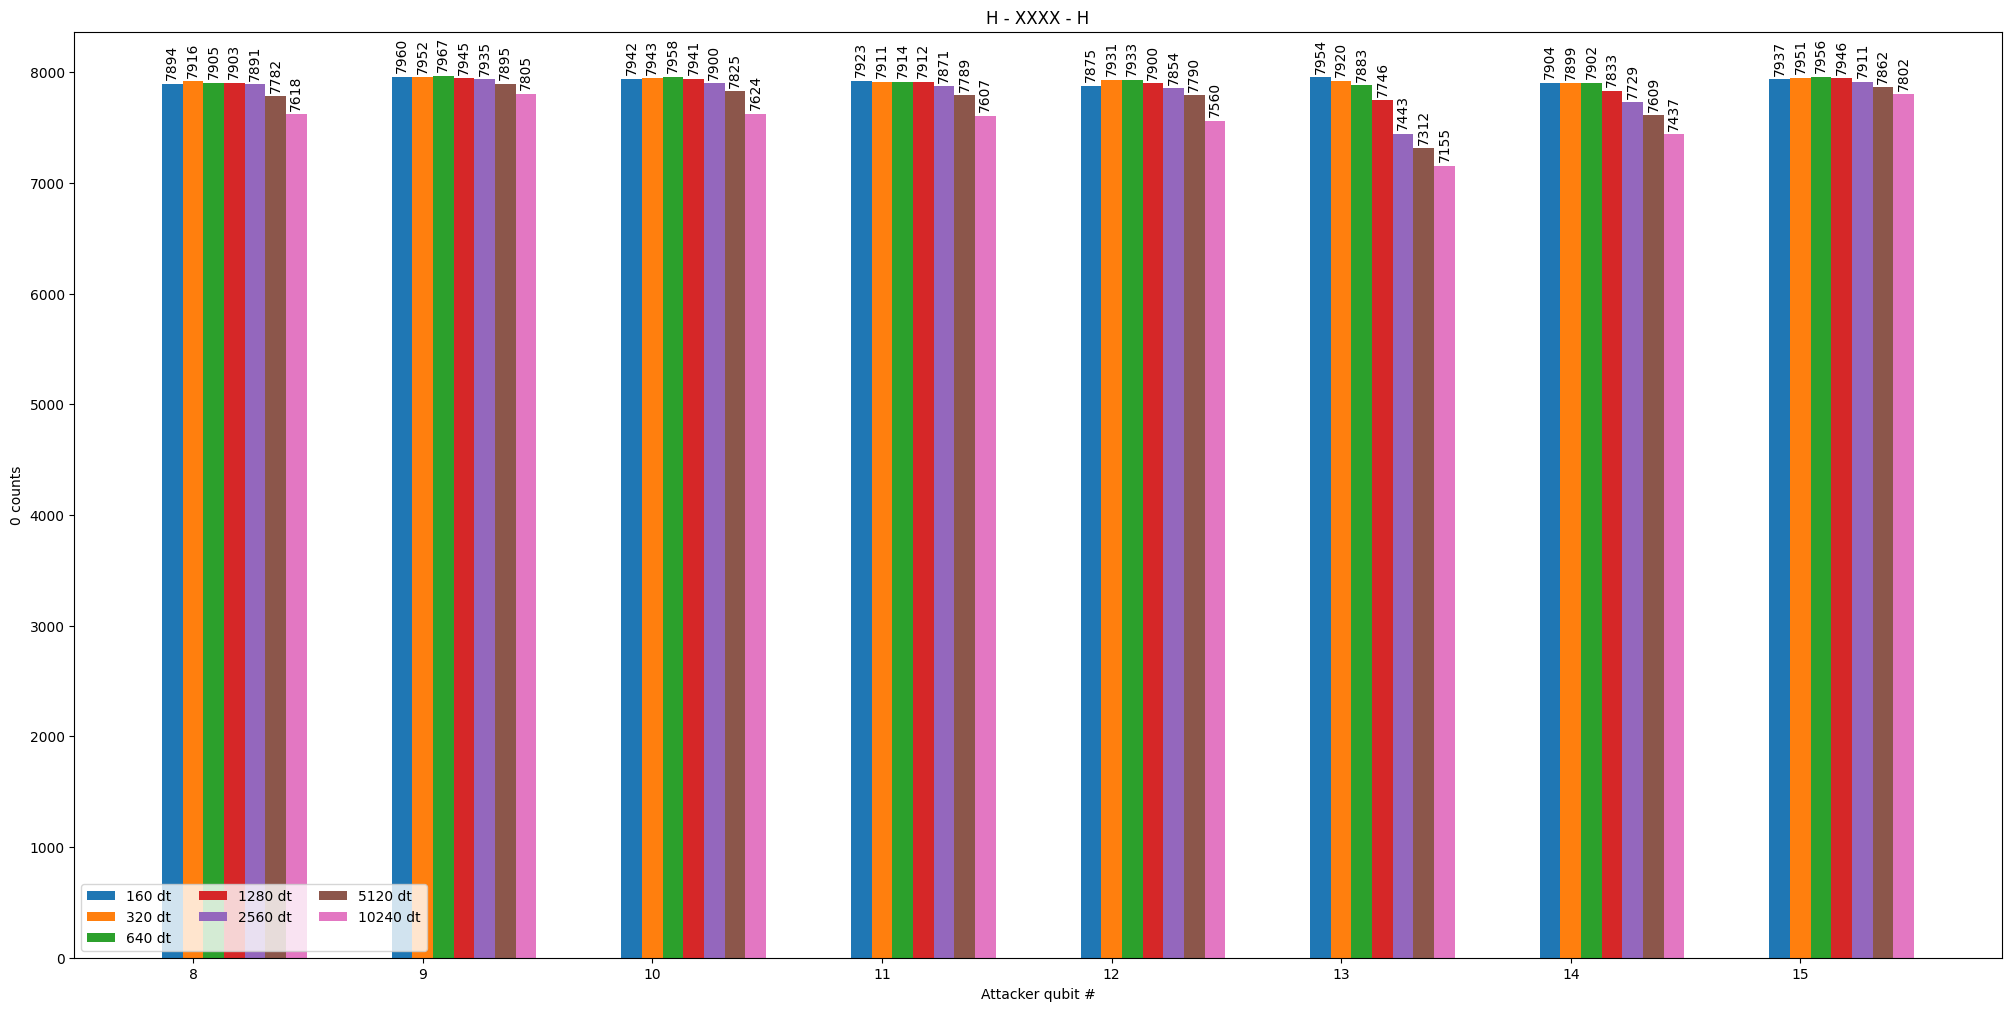

In [18]:
n = 8
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, delay in zip(counts_2, delays):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        key = '{} dt'.format(delay)
        experiments[key] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.09
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title(title)
    ax.set_xticks(x + width, snooper_set)
    ax.legend(loc='lower left', ncols=3)

    plt.show()

## sx_xxxx_sx_x_qcs

In [19]:
counts_2 = split_counts[3]
delays = [ 160, 320, 640, 1280, 2560, 5120, 10240 ]
assert(len(counts_2) == len(delays))
title = 'SX - XXXXX - SX - X'
snooper_qubits = range(16)

range(0, 8)


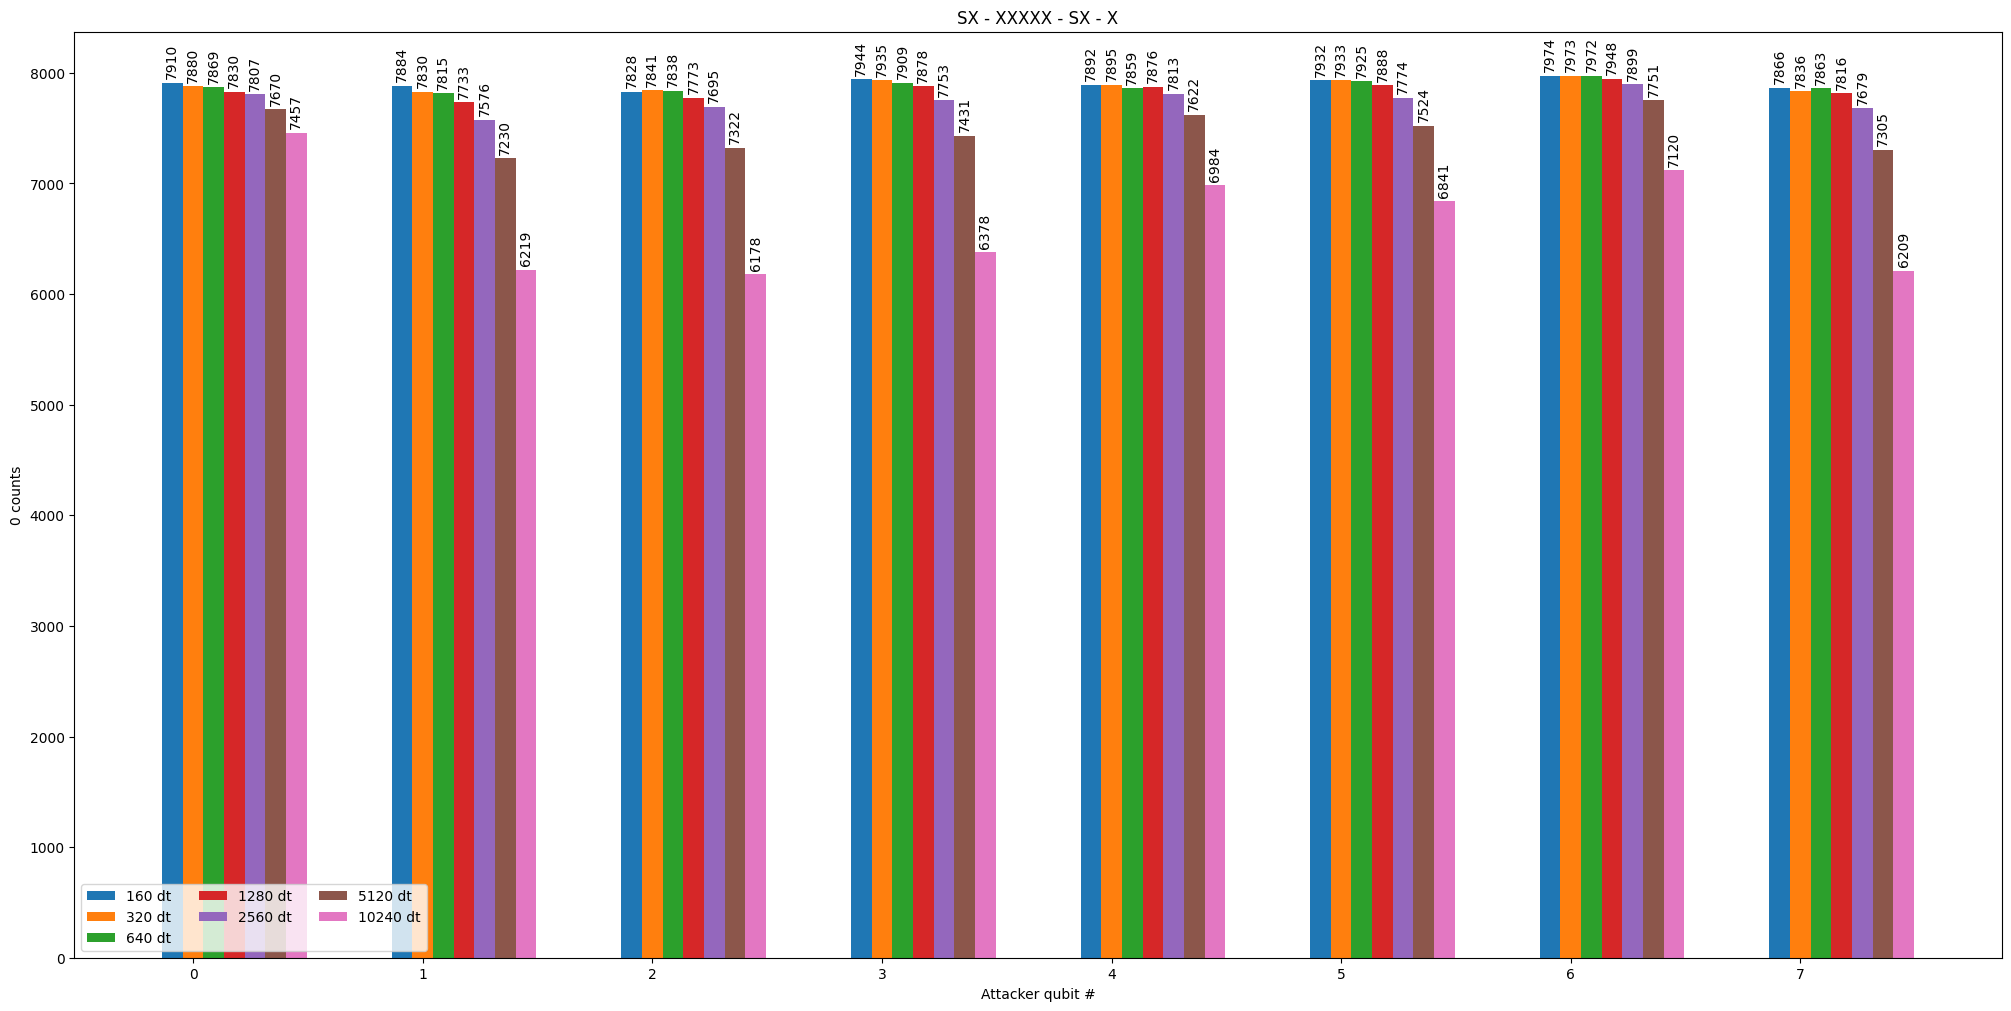

range(8, 16)


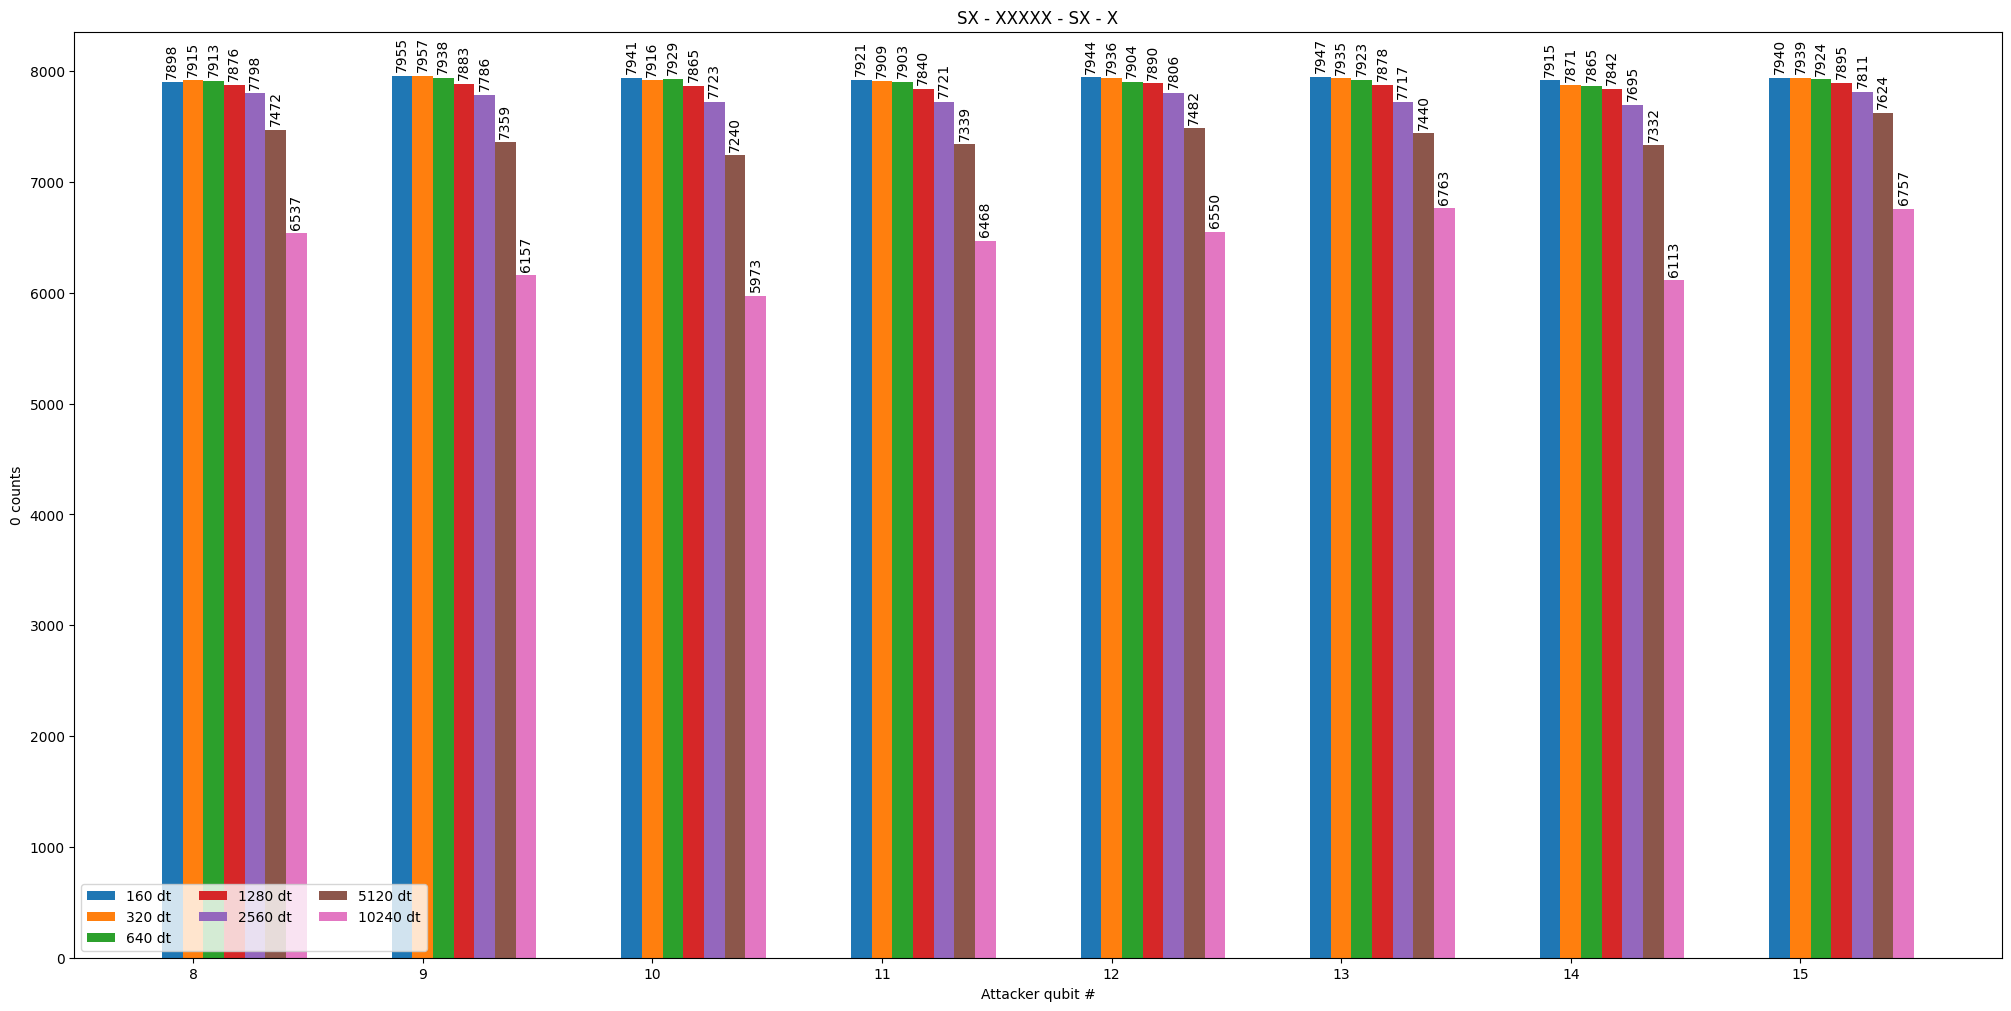

In [20]:
n = 8
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, delay in zip(counts_2, delays):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        key = '{} dt'.format(delay)
        experiments[key] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.09
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title(title)
    ax.set_xticks(x + width, snooper_set)
    ax.legend(loc='lower left', ncols=3)

    plt.show()

# Mistake

## h_delayxx_h_qcs

In [21]:
counts_2 = split_counts[4]
delays = [ 640*i for i in range(1, 5) ]
assert(len(counts_2) == len(delays))
title = 'h_delayxx_h_qcs'
snooper_qubits = range(16)

In [25]:
delays

[640, 1280, 1920, 2560]

range(0, 8)


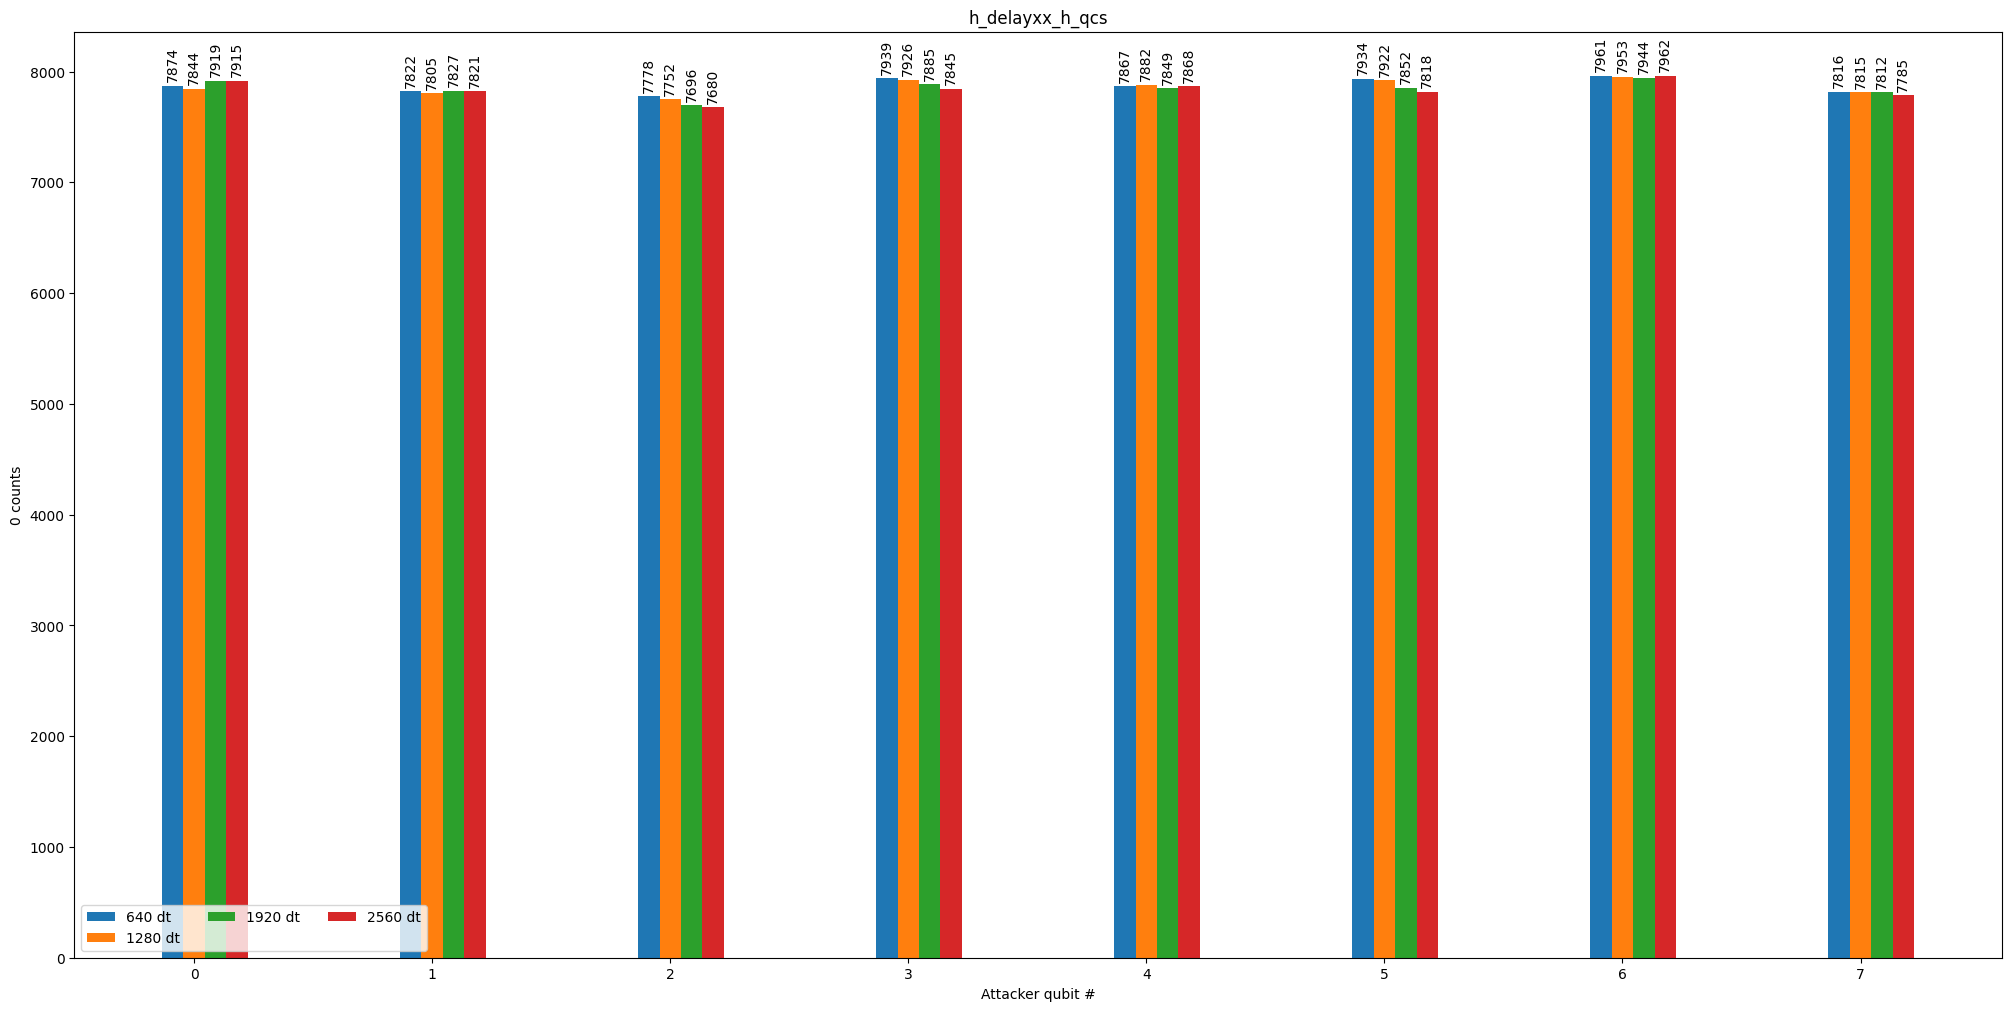

range(8, 16)


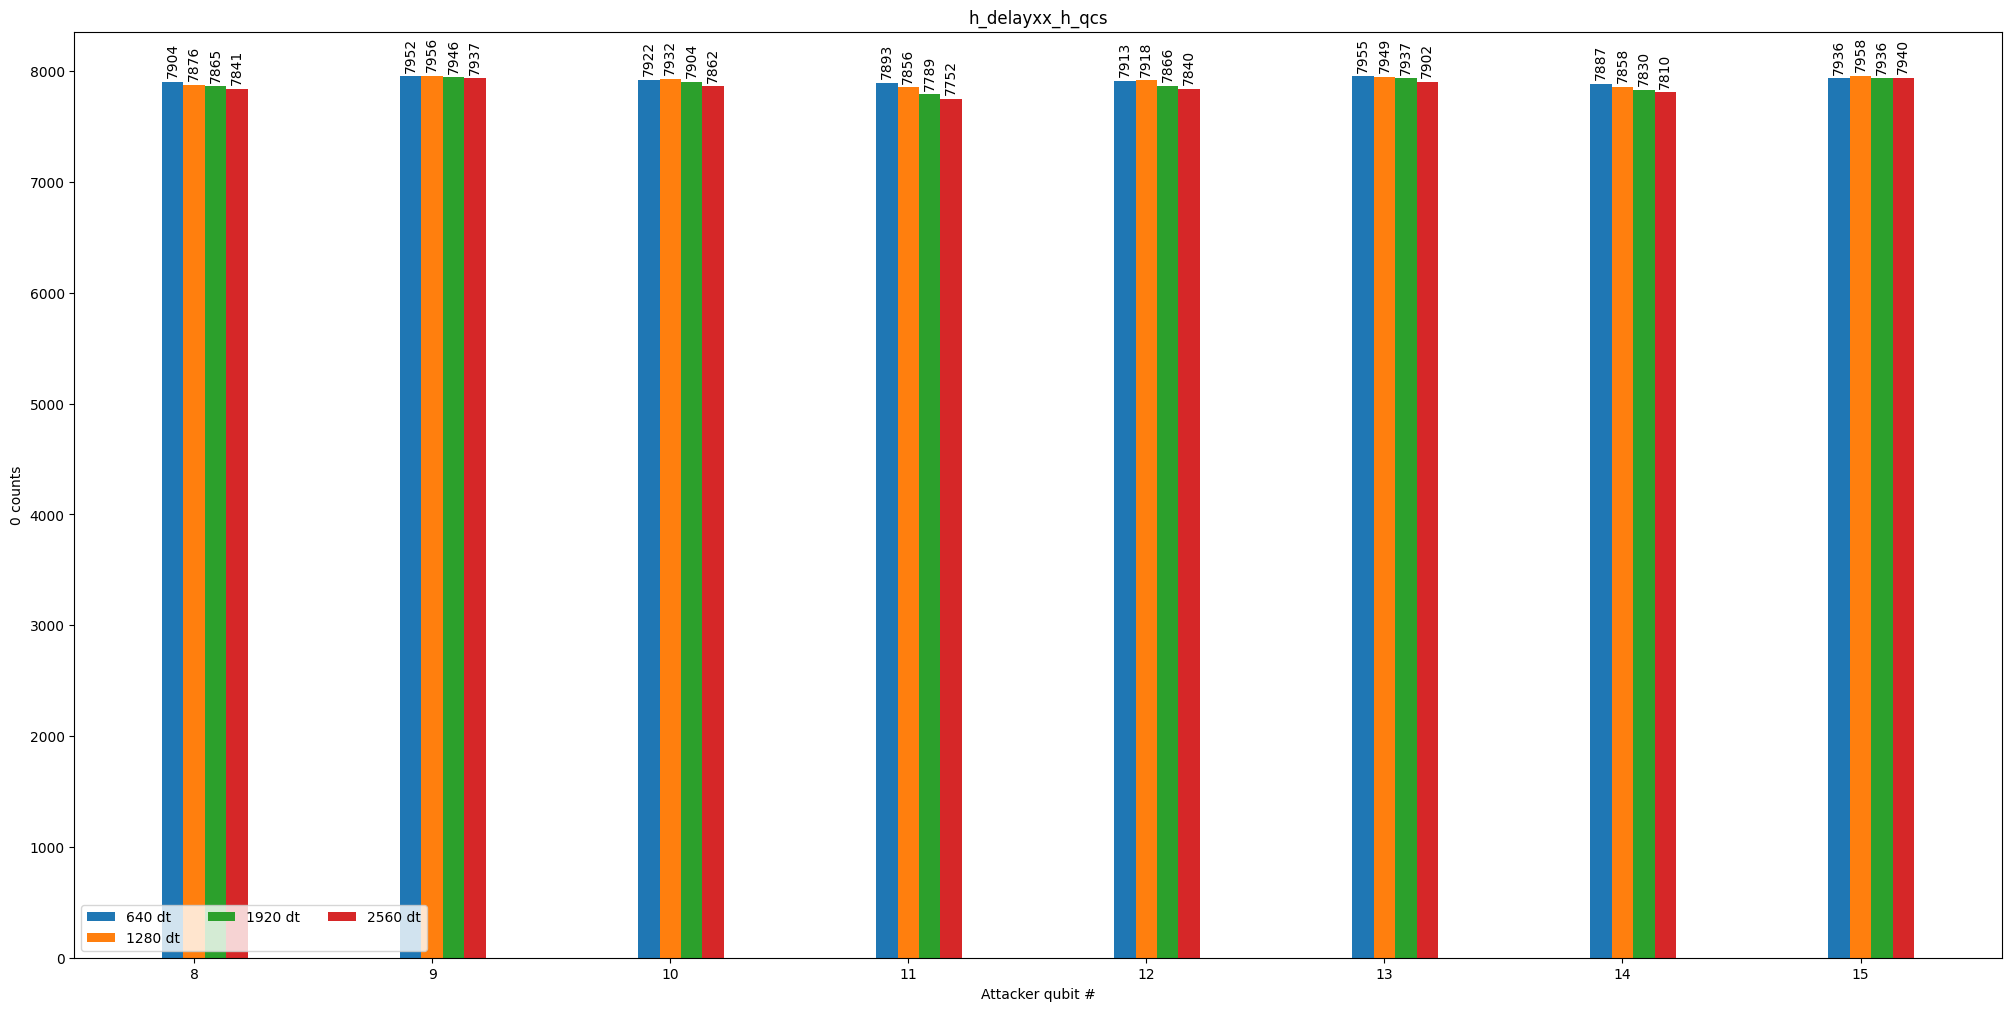

In [22]:
n = 8
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, delay in zip(counts_2, delays):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        key = '{} dt'.format(delay)
        experiments[key] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.09
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title(title)
    ax.set_xticks(x + width, snooper_set)
    ax.legend(loc='lower left', ncols=3)

    plt.show()

## sx_delayxx_sx_x_qcs

In [23]:
counts_2 = split_counts[5]
delays = [ 640*i for i in range(1, 5) ]
assert(len(counts_2) == len(delays))
title = 'sx_delayxx_sx_x_qcs'
snooper_qubits = range(16)

range(0, 8)


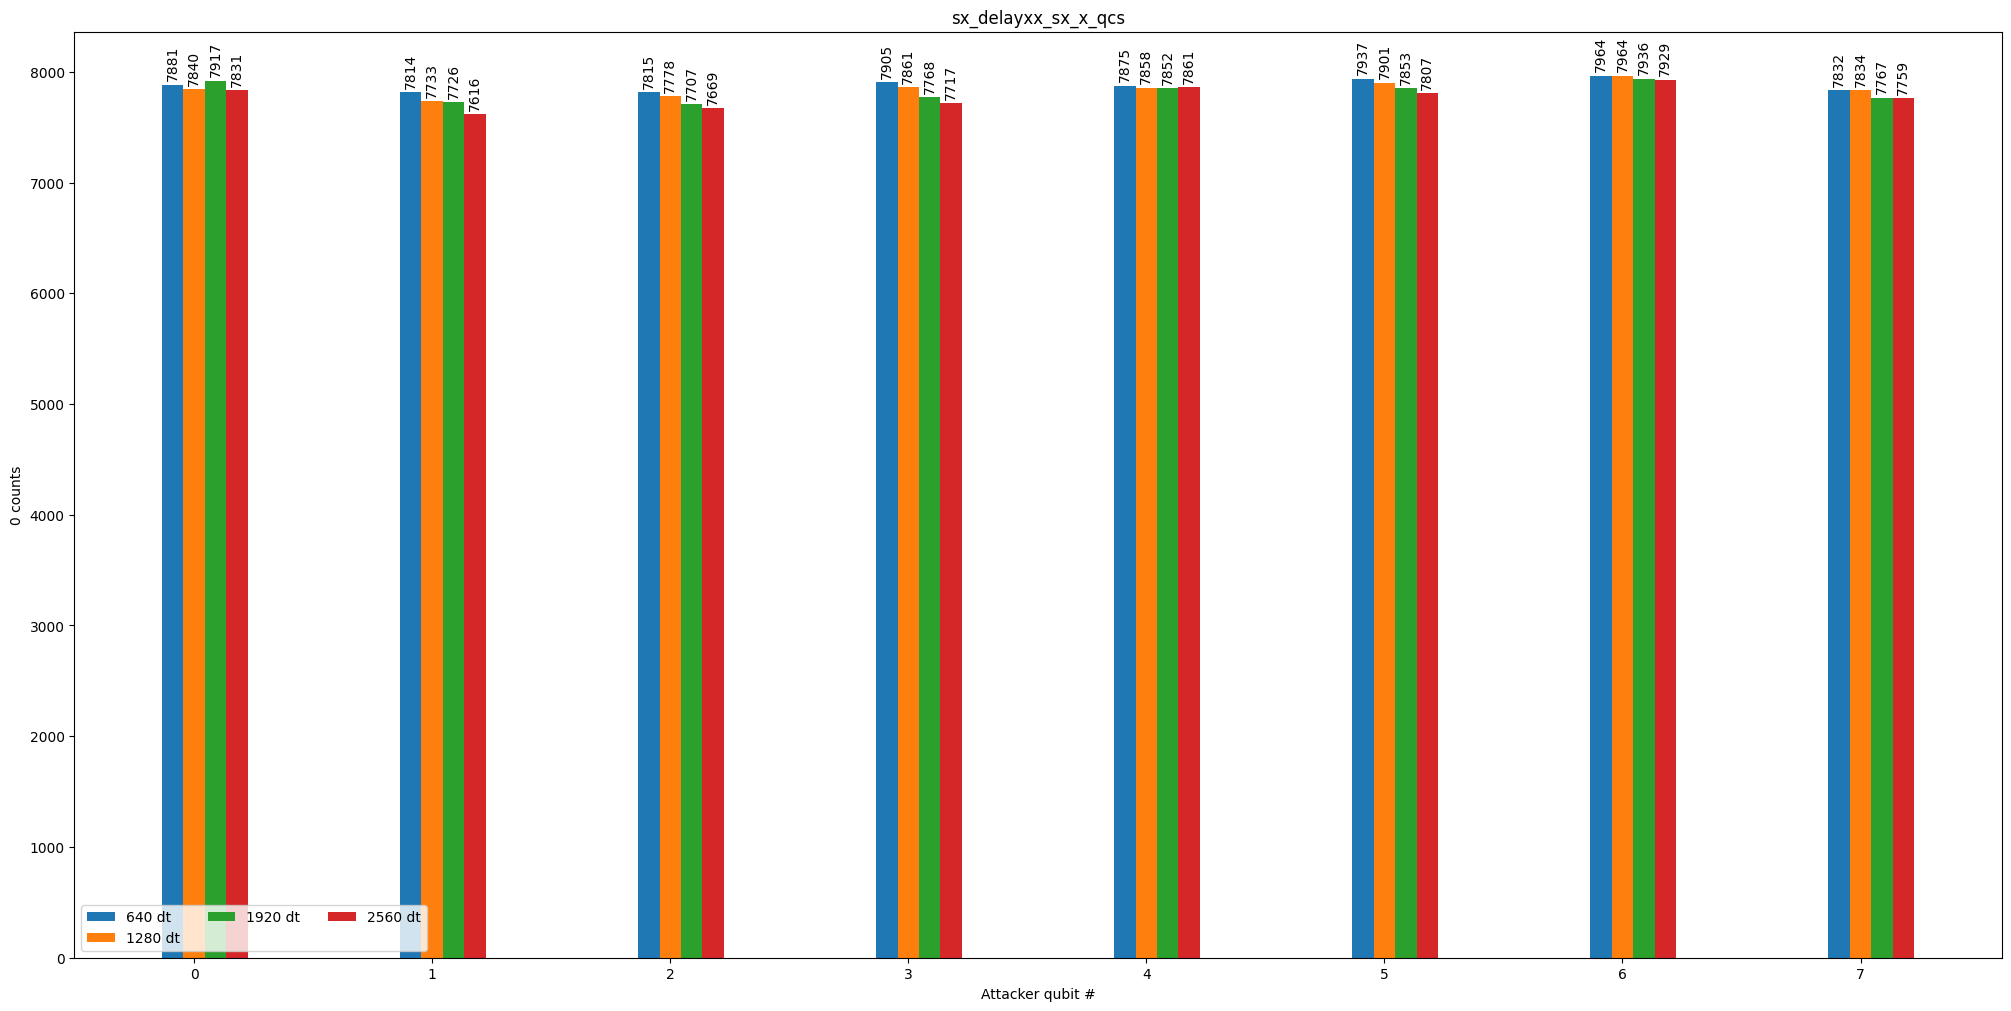

range(8, 16)


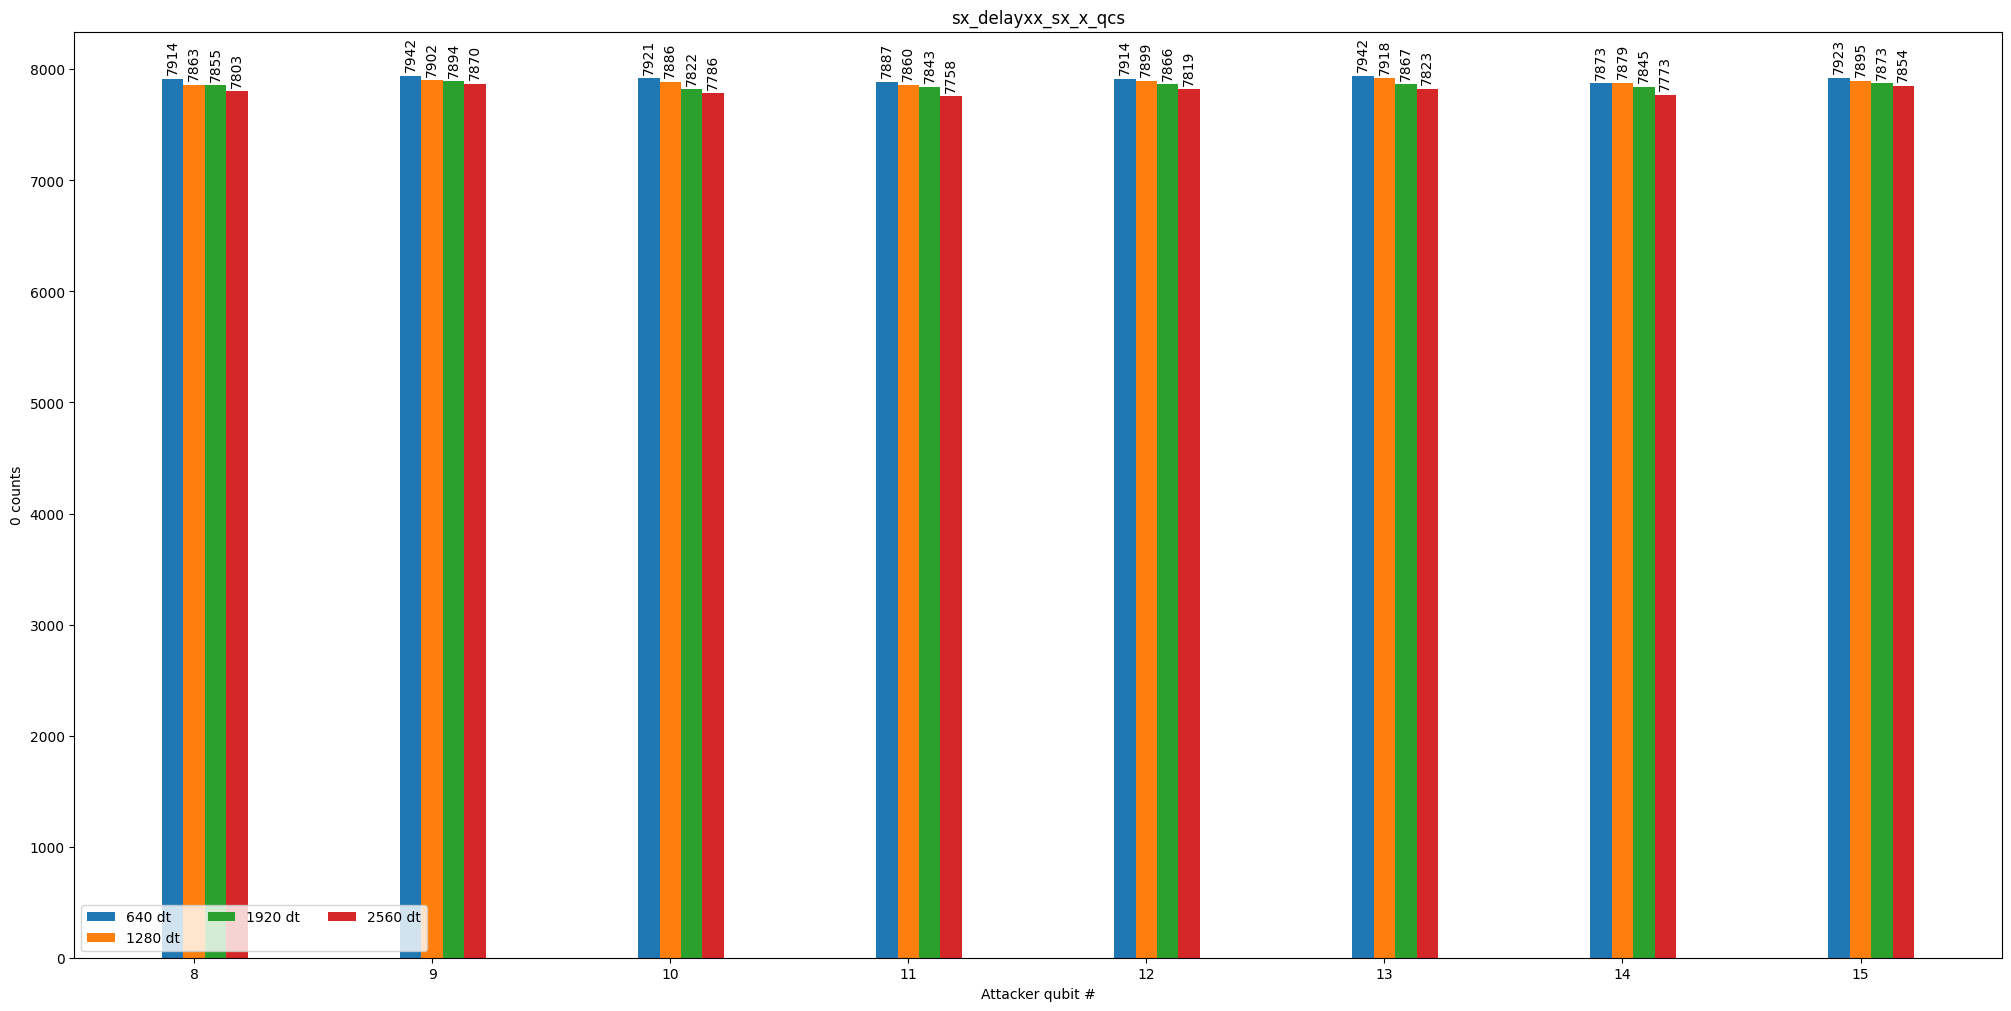

In [24]:
n = 8
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, delay in zip(counts_2, delays):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        key = '{} dt'.format(delay)
        experiments[key] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.09
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title(title)
    ax.set_xticks(x + width, snooper_set)
    ax.legend(loc='lower left', ncols=3)

    plt.show()